In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fertilizer_data_path = r'C:\Users\Dell\Desktop\project\Data_R/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [5]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,1,maize,80,40,20,5.5
2,2,chickpea,40,60,80,5.5
3,3,kidneybeans,20,60,20,5.5
4,4,pigeonpeas,20,60,20,5.5


In [6]:
del merge_fert['Unnamed: 0']

In [7]:
merge_fert.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [8]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

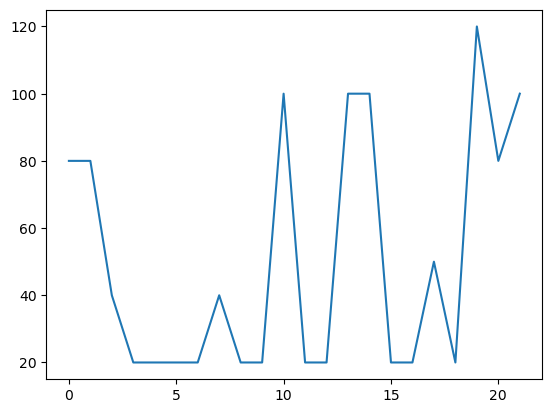

In [9]:
plt.plot(merge_fert["N"])

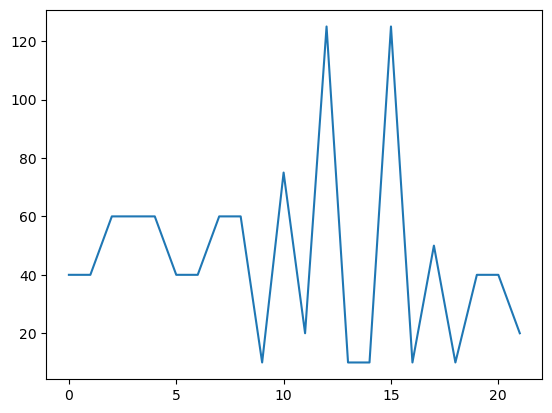

In [10]:
plt.plot(merge_fert["P"])

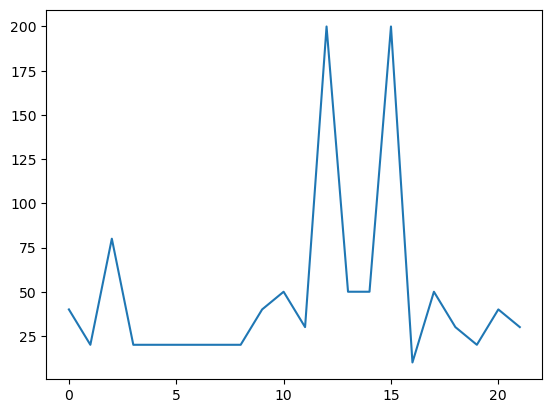

In [11]:
plt.plot(merge_fert["K"])

In [13]:
numeric_columns = merge_fert.select_dtypes(include=['float64', 'int64']).columns

In [14]:
numeric_data = merge_fert[numeric_columns]

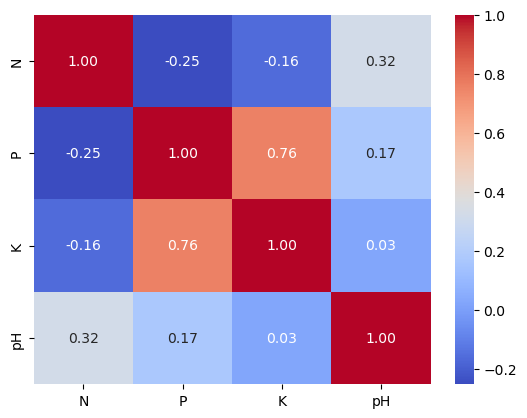

In [15]:
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [16]:
merge_crop = pd.read_csv(r'C:\Users\Dell\Desktop\project\Data_R/MergeFileCrop.csv')
reco_fert = merge_fert

In [19]:
import random

# Assuming merge_crop, reco_fert, and temp are your DataFrames
temp = pd.DataFrame(columns=['N', 'P', 'K'])

for i in range(0, merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20, 20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5, 20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5, 5)
    d = {"N": N, "P": P, "K": K}
    temp = pd.concat([temp, pd.DataFrame(d, index=[0])], ignore_index=True)

# Print or use the modified temp DataFrame
print(temp)

        N   P   K
0      60  52  44
1      87  48  41
2      95  44  45
3      60  38  36
4      60  36  35
...   ...  ..  ..
2195   89  19  33
2196   94  37  34
2197  102  29  33
2198   86  32  26
2199  103  22  27

[2200 rows x 3 columns]


In [20]:
temp

,N,P,K
0,60,52,44
1,87,48,41
2,95,44,45
3,60,38,36
4,60,36,35
...,...,...,...
2195,89,19,33
2196,94,37,34
2197,102,29,33
2198,86,32,26


In [21]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [22]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,60,52,44
1,1,21.770462,80.319644,7.038096,226.655537,rice,87,48,41
2,2,23.004459,82.320763,7.840207,263.964248,rice,95,44,45
3,3,26.491096,80.158363,6.980401,242.864034,rice,60,38,36
4,4,20.130175,81.604873,7.628473,262.717340,rice,60,36,35
...,...,...,...,...,...,...,...,...,...
2195,2195,26.774637,66.413269,6.780064,177.774507,coffee,89,19,33
2196,2196,27.417112,56.636362,6.086922,127.924610,coffee,94,37,34
2197,2197,24.131797,67.225123,6.362608,173.322839,coffee,102,29,33
2198,2198,26.272418,52.127394,6.758793,127.175293,coffee,86,32,26


In [23]:
del merge_crop['Unnamed: 0']

In [24]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,60,52,44
1,21.770462,80.319644,7.038096,226.655537,rice,87,48,41
2,23.004459,82.320763,7.840207,263.964248,rice,95,44,45
3,26.491096,80.158363,6.980401,242.864034,rice,60,38,36
4,20.130175,81.604873,7.628473,262.717340,rice,60,36,35
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,89,19,33
2196,27.417112,56.636362,6.086922,127.924610,coffee,94,37,34
2197,24.131797,67.225123,6.362608,173.322839,coffee,102,29,33
2198,26.272418,52.127394,6.758793,127.175293,coffee,86,32,26


In [25]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [29]:
merge_crop.to_csv(r"C:\Users\Dell\Desktop\project\Raw_Data/crop_recommendation.csv",index=False)

In [30]:
# Checking if everything went fine
df = pd.read_csv(r"C:\Users\Dell\Desktop\project\Raw_Data/crop_recommendation.csv")

In [31]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,60,52,44,20.879744,82.002744,6.502985,202.935536,rice
1,87,48,41,21.770462,80.319644,7.038096,226.655537,rice
2,95,44,45,23.004459,82.320763,7.840207,263.964248,rice
3,60,38,36,26.491096,80.158363,6.980401,242.864034,rice
4,60,36,35,20.130175,81.604873,7.628473,262.717340,rice


In [32]:
df.shape

(2200, 8)